In [14]:
import pandas as pd
import numpy as np 

df = pd.read_csv("../dataset/iris.data.csv")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
df.isna().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [39]:
x = df.drop('Iris-setosa',axis='columns')
y = df['Iris-setosa']


In [40]:
x['petal length (cm)'] = x['1.4']
x['petal width (cm)'] = x['0.2']
x['sepal length (cm)'] =x['5.1']
x['sepal width (cm)'] =x['3.5']
x.head()

,5.1,3.5,1.4,0.2,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,4.9,3.0,1.4,0.2,1.4,0.2,4.9,3.0
1,4.7,3.2,1.3,0.2,1.3,0.2,4.7,3.2
2,4.6,3.1,1.5,0.2,1.5,0.2,4.6,3.1
3,5.0,3.6,1.4,0.2,1.4,0.2,5.0,3.6
4,5.4,3.9,1.7,0.4,1.7,0.4,5.4,3.9


In [41]:
x = x.drop(['5.1','3.5','1.4','0.2'],axis='columns')
x.head()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,1.4,0.2,4.9,3.0
1,1.3,0.2,4.7,3.2
2,1.5,0.2,4.6,3.1
3,1.4,0.2,5.0,3.6
4,1.7,0.4,5.4,3.9


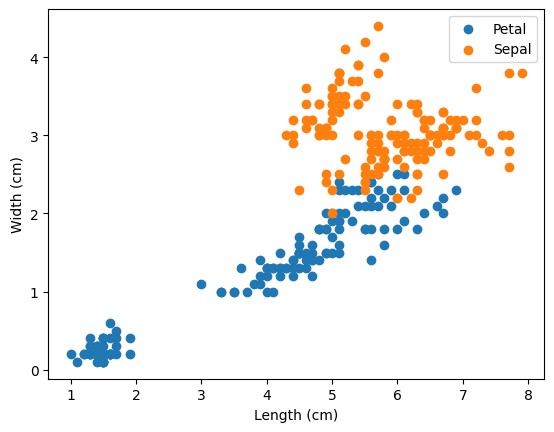

In [45]:
import matplotlib.pyplot as plt

plt.scatter(x['petal length (cm)'], x['petal width (cm)'], label='Petal')
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], label='Sepal')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.legend()

In [46]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

clustor = km.fit_predict(x[['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']])
clustor



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [47]:
km.cluster_centers_

array([[4.39354839, 1.43387097, 5.9016129 , 2.7483871 ],
       [1.46530612, 0.24489796, 5.00408163, 3.41632653],
       [5.74210526, 2.07105263, 6.85      , 3.07368421]])

In [48]:
x['clustor'] = clustor
x.head()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),clustor
0,1.4,0.2,4.9,3.0,1
1,1.3,0.2,4.7,3.2,1
2,1.5,0.2,4.6,3.1,1
3,1.4,0.2,5.0,3.6,1
4,1.7,0.4,5.4,3.9,1


In [49]:
df1 = x[x['clustor']==0]
df2 = x[x['clustor']==1]
df3 = x[x['clustor']==2]

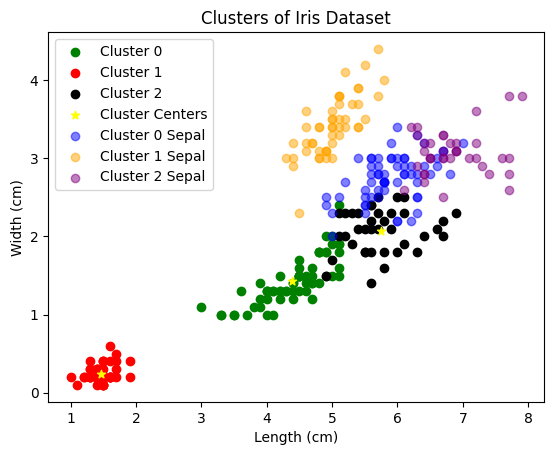

In [51]:
import matplotlib.pyplot as plt

# Plot data points for each cluster with petal length and petal width
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='black', label='Cluster 2')

# Plot cluster centers with petal length and petal width
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='yellow', marker='*', label='Cluster Centers')

# Add labels and legend for petal length and petal width
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Plot data points for each cluster with sepal length and sepal width
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', label='Cluster 0 Sepal', alpha=0.5)
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='orange', label='Cluster 1 Sepal', alpha=0.5)
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='purple', label='Cluster 2 Sepal', alpha=0.5)

# Add labels and legend for sepal length and sepal width
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')

# Add title and legend
plt.title('Clusters of Iris Dataset')
plt.legend()

# Show plot
plt.show()


In [54]:
sse= []
k_range = range(1,11)

for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)

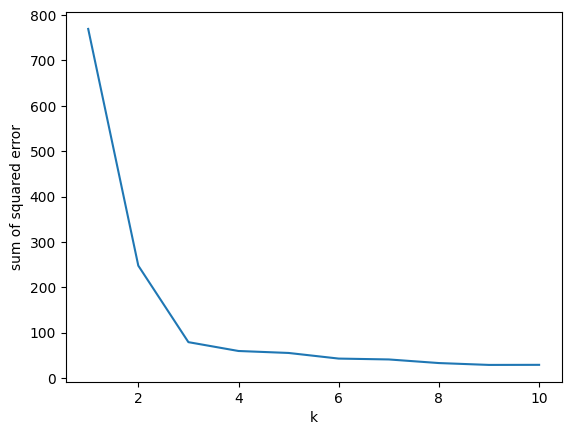

In [53]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)